In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv("/content/employee_promotion.csv")

print(data.head())


   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  awards_won  avg_training_score  is_promoted  
0                  8           0                49.0            0  
1         

# Interpretation of Columns:

**department**:

This column represents the department in which the employee works. It's a categorical variable indicating the employee's functional area within the organization.

**education: **

This column denotes the education level of the employee. It could include categories such as "Bachelor's," "Master's," "High School," etc.

**no_of_trainings**:

 This column indicates the number of other trainings completed by the employee in the previous year on soft skills, technical skills, etc.

**age**:

Age of the employee.

**previous_year_rating:**

Employee rating for the previous year. It likely ranges from 1 to 5, with 5 being the highest rating.

**length_of_service:**

Length of service in years for the employee.

**awards_won:**

 Binary variable indicating whether the employee won any awards during the previous year (1 for yes, 0 for no).

**avg_training_score:**

Average score in current training evaluations.

**is_promoted:**

Target variable indicating whether the employee was recommended for promotion (1 for yes, 0 for no).


In [ ]:
data_processed = data.drop(columns=['employee_id', 'region', 'gender', 'recruitment_channel'])

data_processed.rename(columns={'no_of_trainings': 'training_count',
                                'previous_year_rating': 'previous_rating',
                                'length_of_service': 'service_length',
                                'awards_won': 'won_awards',
                                'avg_training_score': 'training_score',
                                'is_promoted': 'promotion_status'}, inplace=True)

data_processed.dropna(inplace=True)

print(data_processed.head())


          department         education  training_count  age  previous_rating  \
0  Sales & Marketing  Master's & above               1   35              5.0   
1         Operations        Bachelor's               1   30              5.0   
2  Sales & Marketing        Bachelor's               1   34              3.0   
3  Sales & Marketing        Bachelor's               2   39              1.0   
4         Technology        Bachelor's               1   45              3.0   

   service_length  won_awards  training_score  promotion_status  
0               8           0            49.0                 0  
1               4           0            60.0                 0  
2               7           0            50.0                 0  
3              10           0            50.0                 0  
4               2           0            73.0                 0  


In [ ]:

features = data_processed[['training_count', 'age', 'previous_rating', 'service_length', 'won_awards', 'training_score']]


In [ ]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
print(data_processed.columns)

Index(['department', 'education', 'training_count', 'age', 'previous_rating',
       'service_length', 'won_awards', 'training_score', 'promotion_status'],
      dtype='object')


In [ ]:

Q1 = data_processed[['training_count', 'age', 'service_length', 'training_score']].quantile(0.25)
Q3 = data_processed[['training_count', 'age', 'service_length', 'training_score']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_processed[['training_count', 'age', 'service_length', 'training_score']] < (Q1 - 1.5 * IQR)) |
            (data_processed[['training_count', 'age', 'service_length', 'training_score']] > (Q3 + 1.5 * IQR))).any(axis=1)
print("Outliers:")
print(data_processed[outliers])



Outliers:
              department         education  training_count  age  \
3      Sales & Marketing        Bachelor's               2   39   
5              Analytics        Bachelor's               2   31   
13            Technology  Master's & above               2   39   
24               Finance  Master's & above               2   39   
33            Operations        Bachelor's               2   57   
...                  ...               ...             ...  ...   
54792  Sales & Marketing        Bachelor's               1   59   
54798  Sales & Marketing  Master's & above               2   40   
54800                 HR        Bachelor's               2   34   
54802  Sales & Marketing        Bachelor's               2   31   
54803         Technology        Bachelor's               1   48   

       previous_rating  service_length  won_awards  training_score  \
3                  1.0              10           0            50.0   
5                  3.0               7       

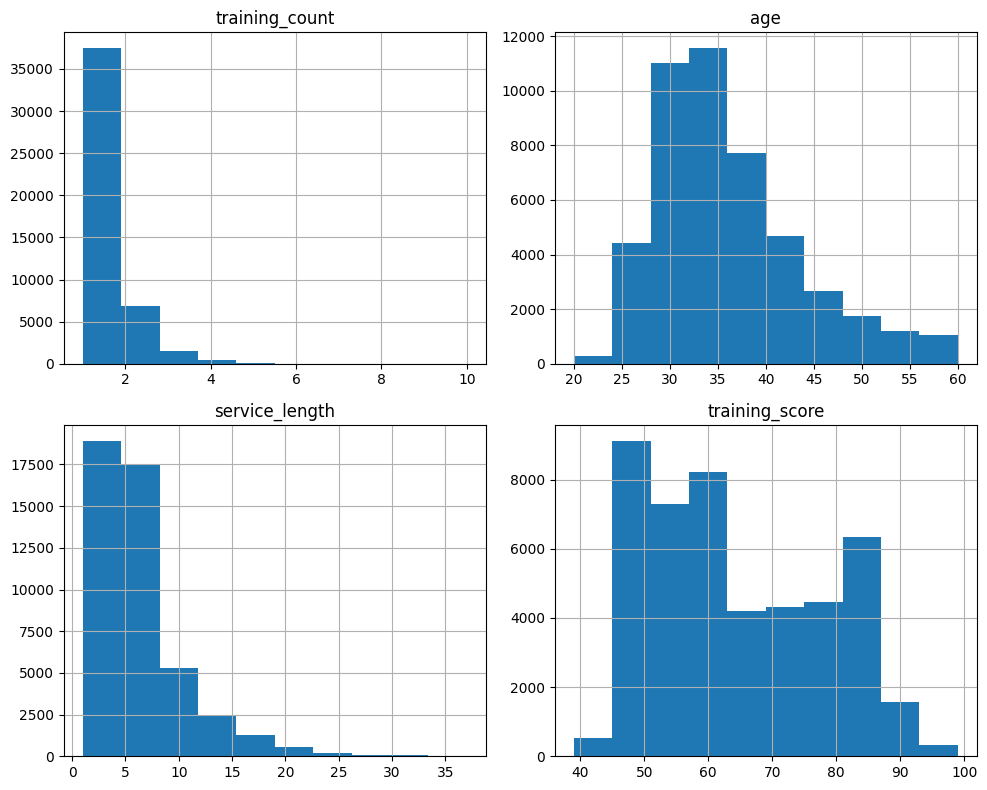

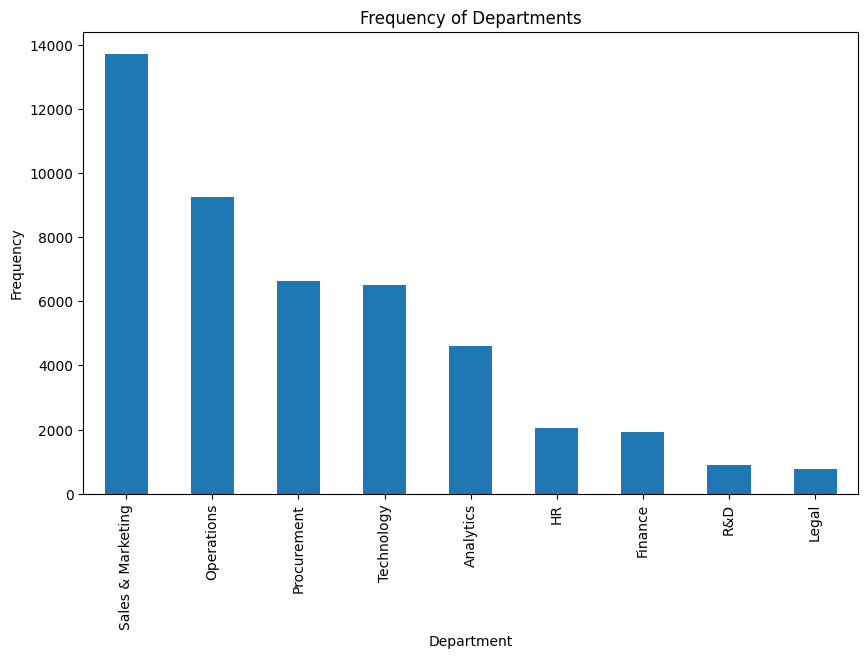

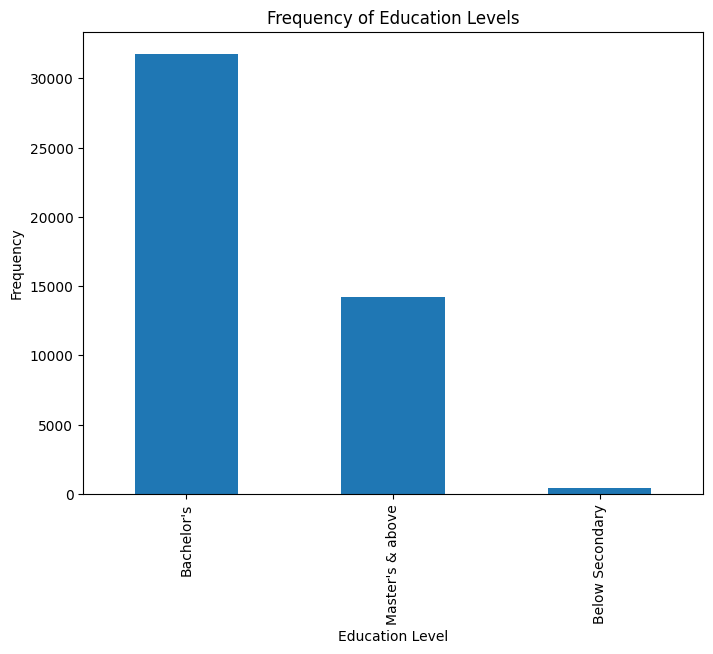

In [ ]:
data_processed[['training_count', 'age', 'service_length', 'training_score']].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
data_processed['department'].value_counts().plot(kind='bar')
plt.title('Frequency of Departments')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
data_processed['education'].value_counts().plot(kind='bar')
plt.title('Frequency of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()


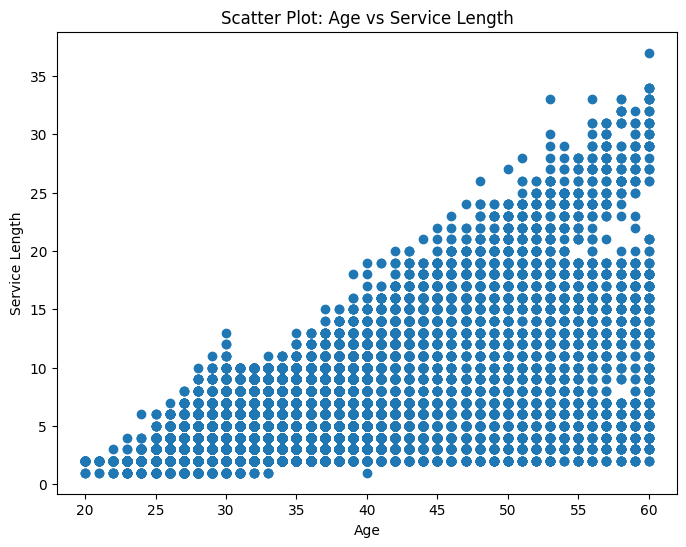

<Figure size 800x600 with 0 Axes>

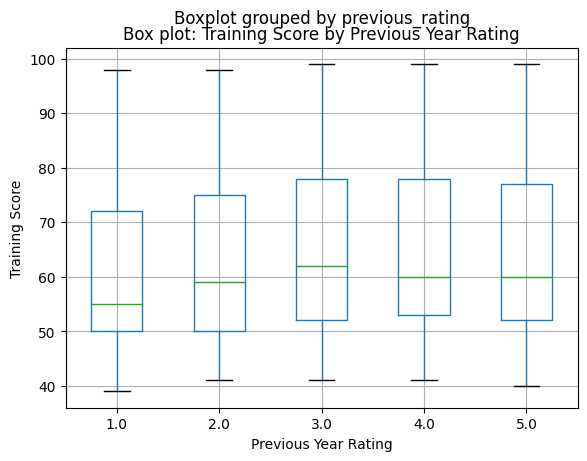

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data_processed['age'], data_processed['service_length'])
plt.title('Scatter Plot: Age vs Service Length')
plt.xlabel('Age')
plt.ylabel('Service Length')
plt.show()

plt.figure(figsize=(8, 6))
data_processed.boxplot(column='training_score', by='previous_rating')
plt.title('Box plot: Training Score by Previous Year Rating')
plt.xlabel('Previous Year Rating')
plt.ylabel('Training Score')
plt.show()


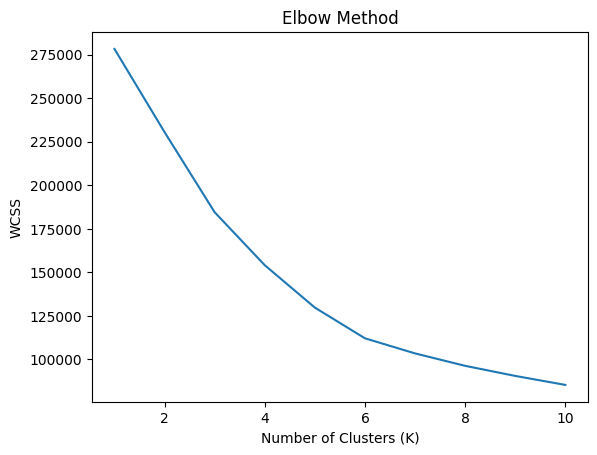

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


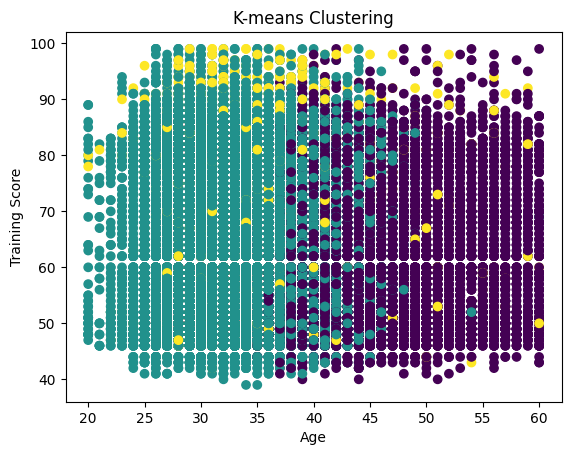

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

data_processed['cluster'] = clusters

plt.scatter(data_processed['age'], data_processed['training_score'], c=data_processed['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Training Score')
plt.title('K-means Clustering')
plt.show()


In [ ]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42,n_init='auto')
kmeans.fit(scaled_features)

centroids = kmeans.cluster_centers_

print("Centroids of the clusters:")
print(centroids)


Centroids of the clusters:
[[-1.83709689e-01  1.41002034e+00 -8.99542009e-04  1.25577084e+00
  -1.55135821e-01 -2.10994848e-01]
 [ 5.45956829e-02 -4.02078767e-01 -5.62754526e-03 -3.51604993e-01
  -1.55135821e-01  4.56479502e-02]
 [-6.09808657e-02 -7.94653977e-02  1.90030162e-01 -2.80260243e-01
   6.44596453e+00  4.80666667e-01]]


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

inertia = kmeans.inertia_
print(f"Inertia: {inertia}")


Silhouette Score: 0.11386146780444294
Inertia: 184504.4229443504


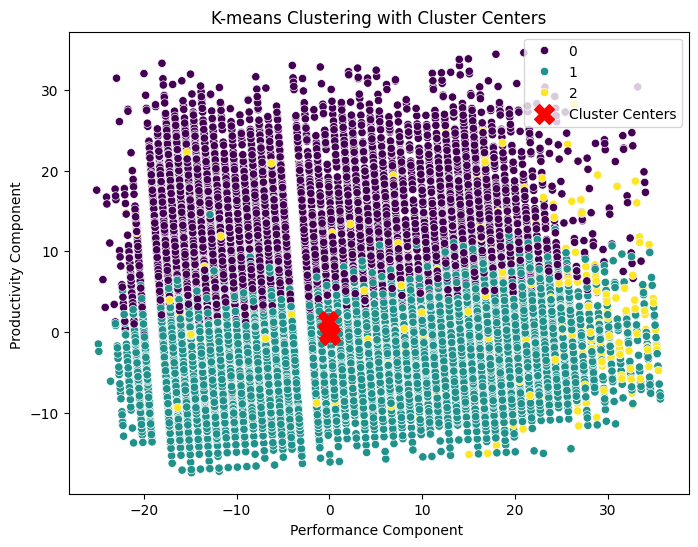

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=kmeans.labels_, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Cluster Centers')  # Plotting the cluster centers
plt.title('K-means Clustering with Cluster Centers')
plt.xlabel('Performance Component ')
plt.ylabel('Productivity Component ')
plt.legend()
plt.show()


From the provided outputs, we can derive several insights about the clustering of the data:

1. **Silhouette Score**: The Silhouette Score indicates the quality of clustering. A score closer to 1 suggests that the clusters are well-separated, while a score closer to -1 suggests that the clusters are overlapping. In this case, the Silhouette Score is around 0.114, indicating that the clusters are not very well-separated but still have some degree of separation.

2. **Inertia**: Inertia measures the within-cluster sum of squared distances from each sample to its closest cluster center. A lower inertia indicates that the clusters are more compact and well-separated. In this case, the inertia is quite high (184504.42), indicating that the clusters may not be very compact.

3. **Centroids**: The centroids represent the mean values of each principal component within each cluster. By examining the centroids, we can identify the average characteristics of each cluster. For example, in Cluster 1, the values of Component 2 and Component 4 are relatively high compared to the other clusters, suggesting that Cluster 1 may represent employees with higher scores in those aspects.

